In [314]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import os

import random

In [315]:
#READING IMAGES FROM OUR TRAINING DATA FOLDER
for dirname, _, filenames in os.walk('images'): #reading data from our "images" folder, where all fruits subfolders are stored
    for filename in filenames:
        print(os.path.join(dirname, filename))

images\apple fruit\Image_1.jpg
images\apple fruit\Image_10.jpg
images\apple fruit\Image_11.jpg
images\apple fruit\Image_12.jpg
images\apple fruit\Image_13.png
images\apple fruit\Image_14.png
images\apple fruit\Image_15.jpg
images\apple fruit\Image_16.jpg
images\apple fruit\Image_17.jpeg
images\apple fruit\Image_18.jpg
images\apple fruit\Image_19.jpg
images\apple fruit\Image_2.jpg
images\apple fruit\Image_20.jpg
images\apple fruit\Image_21.jpg
images\apple fruit\Image_22.jpg
images\apple fruit\Image_23.png
images\apple fruit\Image_24.jpg
images\apple fruit\Image_25.jpg
images\apple fruit\Image_26.jpg
images\apple fruit\Image_27.jpg
images\apple fruit\Image_28.png
images\apple fruit\Image_29.jpg
images\apple fruit\Image_3.jpeg
images\apple fruit\Image_30.jpg
images\apple fruit\Image_31.png
images\apple fruit\Image_32.jpg
images\apple fruit\Image_33.jpg
images\apple fruit\Image_34.jpeg
images\apple fruit\Image_35.jpg
images\apple fruit\Image_36.jpg
images\apple fruit\Image_37.jpg
images\a

In [316]:
#TO ENSURE THAT THE SEQUENCE OF RANDOM NUMBER GENERATION IS THE SAME EVERY TIME WE GENERATE THEM
tf.random.set_seed(5)
#INCREASING SIZE AND DIVERSITY OF OUR TRAINING DATASET BY APPLYING TRANSFORMATIONS TO EXISTING DATA SO THE TRAINING DATA RANGE IS EXPANDED EVEN MORE
generateData = ImageDataGenerator(rotation_range=10, #rotate image +/- 10 degrees
            rescale = 1./255, #rescaling pixel quality
            width_shift_range=0.1, #shifting image horizontally
            height_shift_range=0.1, #shifting image vertically
            horizontal_flip=True, #flipping images horizontally
            vertical_flip=False, #flipping images vertically
            zoom_range=0.1, #zooming in and out images
            shear_range=0.1, #shearing images
            brightness_range=[0.8, 1.2], #voluming brightness
            fill_mode='nearest',
            validation_split=0.2  # set validation split to 20%
            )

In [317]:
#SEPARATING OUR DATA TO trainData and testData AND ADDING SOME PARAMETERS
trainingData = generateData.flow_from_directory("images", #selecting folder where data is located
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(100,100), #resizeing our images so they are all same
                                              subset = 'training' #setting the subset as training
                                            )

testingData = generateData.flow_from_directory("images", #selecting folder where data is located
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(100,100), #resizeing our images so they are all same
                                              subset = 'validation' #setting the subset as validating subset
                                            )

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [318]:
#DIVIDING OUR TRAINING DATASET INTO CLASSES THAT ARE REPRESENTED BY NUMBERS AND EACH OF THOSE 9 NUMBERS INDICATES ONE TYPE OF FRUIT OR SUBFOLDER OF FRUIT (CONTAINING 32 TRAINING IMAGES OUT OF TOTAL 40 OF THEM)
trainingData.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8])

In [319]:
#LABELING OUR CLASSES WITH CORRESPONDING FRUIT NAME FROM THE FOLDERS
trainingData.class_indices

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

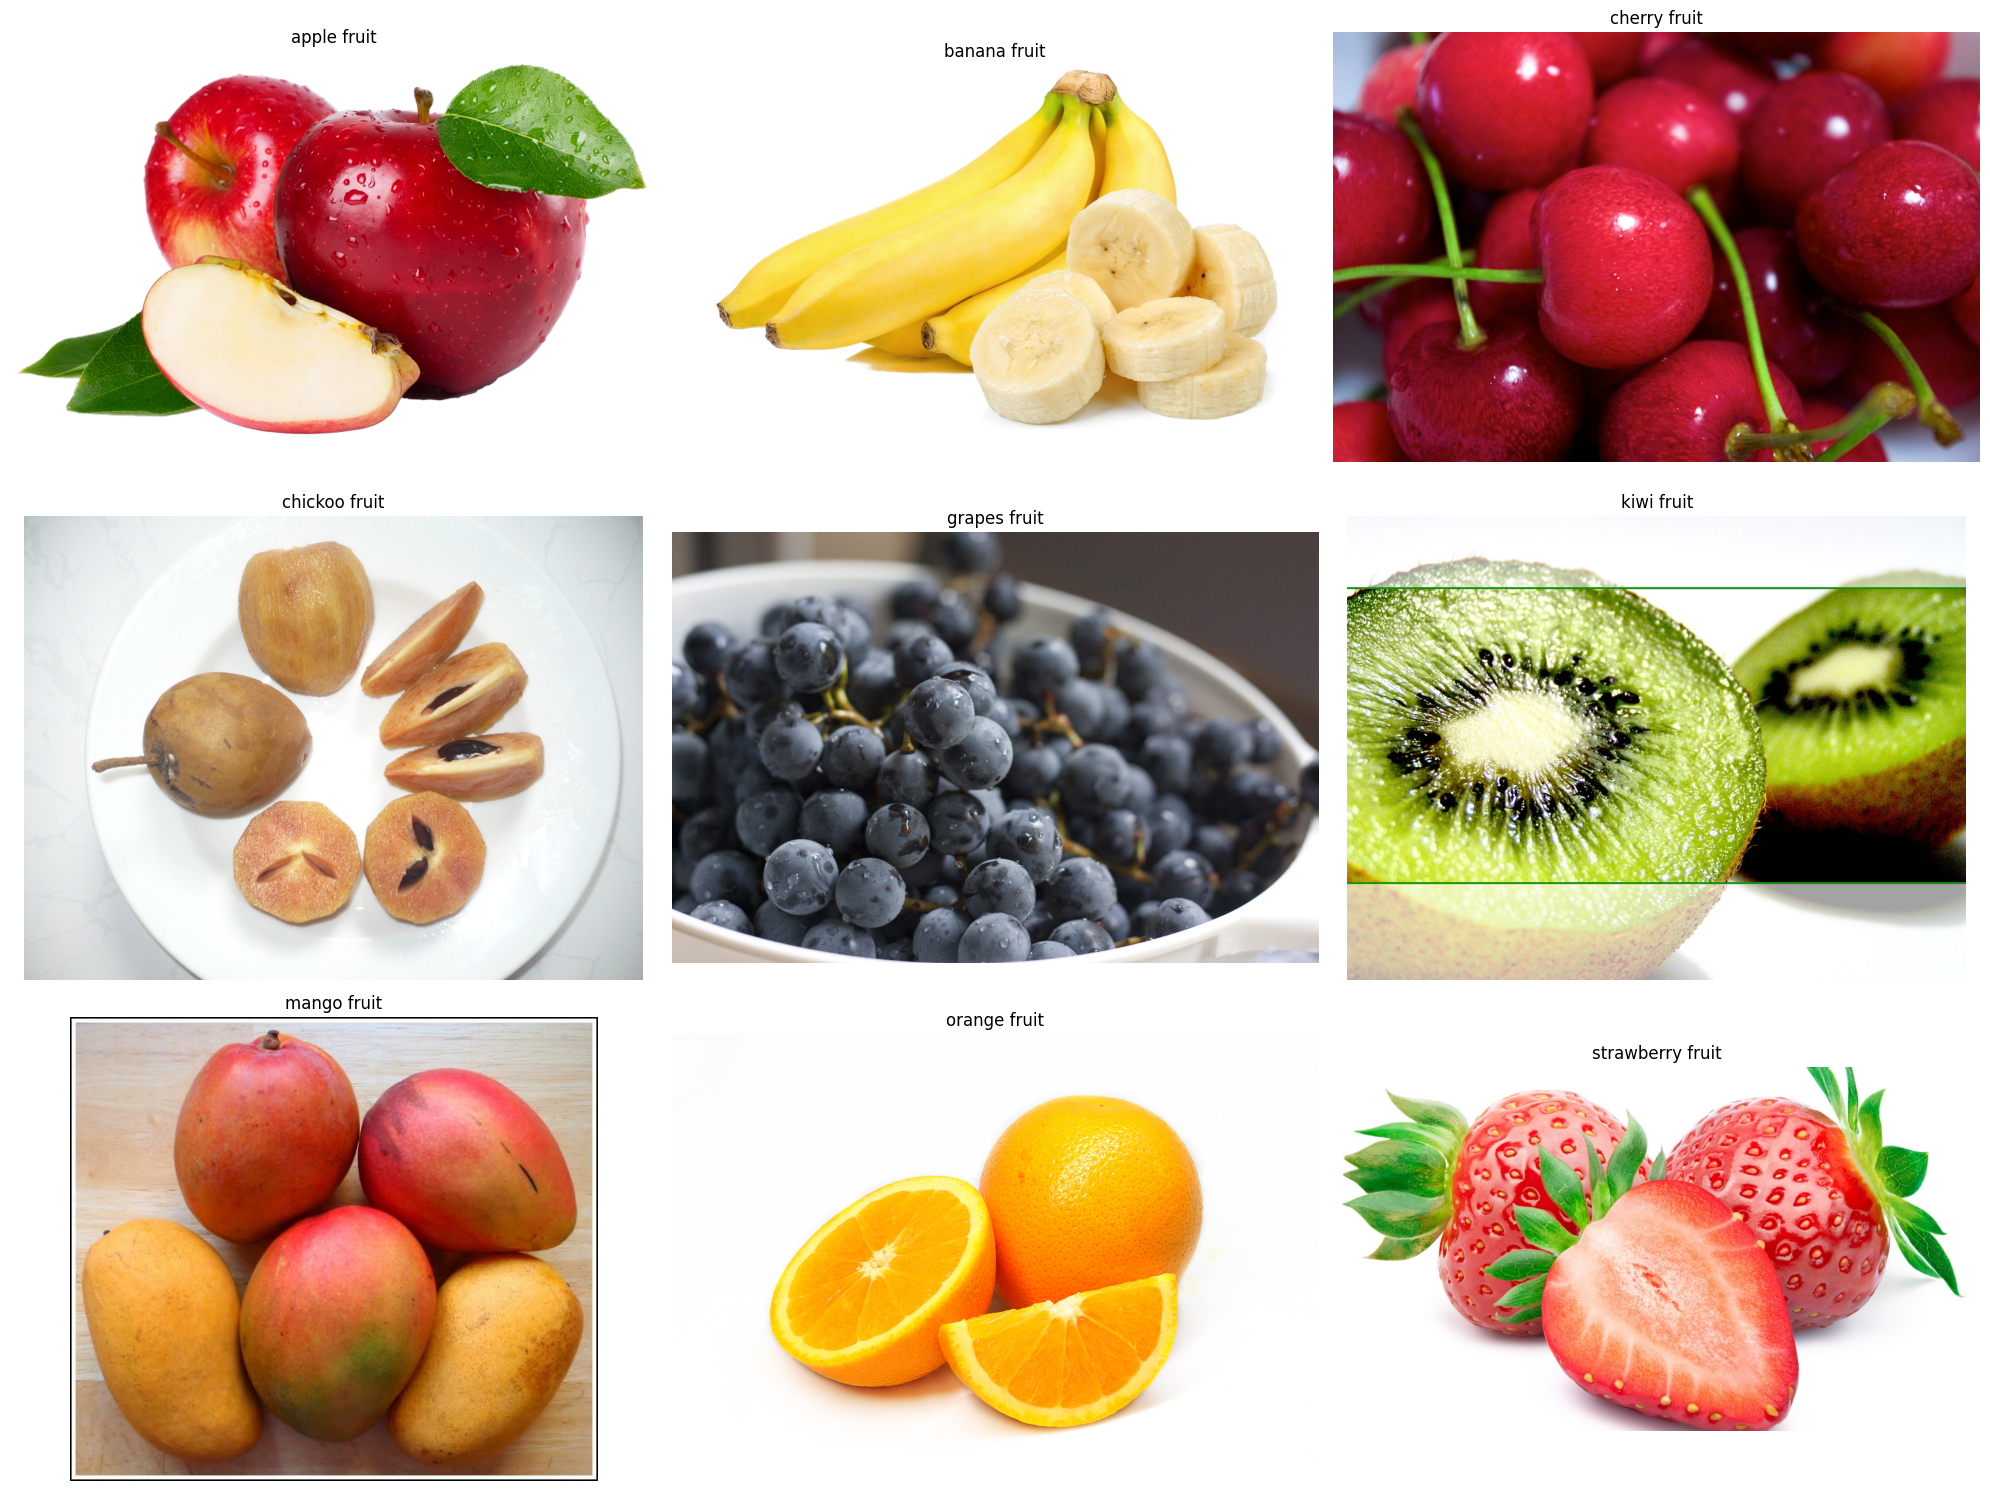

In [320]:
#EXECUTION OF FUNCTIONS

#DECLARING OUR PATH WHERE OUR IMAGES ARE LOCATED
path = 'images'

#DECLARING OUR LIST OF CLASS NAMES SO IT CAN BE USED IN "trainingData.class_indices"
classNames = ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']

#INTERFACE TO DISPLAY THE IMAGES PROPERLY TO THE USER
fig = plt.figure(figsize=(20, 15))

#FOR LOOP TO ITERATE THROUGH EACH OF OUR DECLARED CLASSES
for i, singleClass in enumerate(classNames):

    #FOR EACH ITERATION, GETTING A LIST OF IMAGE FILES IN THAT CLASS DIRECTORY
    classDirectory = os.path.join(path, singleClass)
    imgFiles = os.listdir(classDirectory)

    #SELECTING RANDOM IMAGE FROM EACH CLASS(SUB-FOLDER) SO IT CAN BE PROCESSED
    randomImg = random.choice(imgFiles)
    imgPath = os.path.join(classDirectory, randomImg)

    #LOADING OUR IMAGES
    imagePlot = fig.add_subplot(3, 3, i+1)
    img = mpimg.imread(imgPath)
    imagePlot.imshow(img)
    imagePlot.set_title(singleClass)
    imagePlot.axis('off')

#PLOTTING OUR SELECTED IMAGES
plt.tight_layout()
plt.show()

In [321]:
class Dense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, use_bias=True):
        super(Dense, self).__init__()
        self.units = units
        self.activation = activation
        self.use_bias = use_bias
        self.kernel = None
        self.biases = None

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='random_normal',
                                      trainable=True,
                                      name="kernel")
        if self.use_bias:
            self.biases = self.add_weight(shape=(self.units,),
                                          initializer='zeros',
                                          trainable=True,
                                          name="bias")

    def call(self, inputs):
        output = tf.matmul(inputs, self.kernel)
        if self.use_bias:
            output += self.biases
        if self.activation is not None:
            output = tf.keras.activations.get(self.activation)(output)
        return output

In [322]:
class Dropout(tf.keras.layers.Layer):
    def __init__(self, rate, **kwargs):
        super(Dropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=True):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        else:
            return inputs

In [323]:
#DEFINING THE STRUCTURE OF THE DATA THAT THE MODEL WILL RECEIVE(MAKING IT SAME FOR EVERY INPUT)
shape = trainingData.image_shape

#CREATING MODEL ARCHITECTURE FOR OUR TESTING DATASET
trainingModel = tf.keras.models.Sequential() #creating linear stack of layers so we can add them one by one when we process our data

trainingModel.add(tf.keras.layers.Conv2D(64,(3,3), input_shape = shape,activation='relu',padding='same')) #adding convolutional layer with 64 filters and 3,3 kernel size. The shape of argument is same as inout shape and reLu activation function is applied on this stage.

trainingModel.add(tf.keras.layers.MaxPool2D(2,2)) #reducing spatial dimensions of the input by adding max pooling of 2,2 to our trainingModel

trainingModel.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu')) #adding one more convolutional layer to our training model with 32 filters and kernel size of 3,3. Shape does not have to be defined again and the activation function being applied at this layer is reLu.

trainingModel.add(tf.keras.layers.MaxPool2D(2,2)) #same as previous pooling layer

trainingModel.add(tf.keras.layers.Flatten()) #converting our multidimensional array into 1D array

trainingModel.add(Dense(128,activation = 'relu'))#adding dense layer with 128 units and applying reLu activation function on it

trainingModel.add(Dropout(0.25)) #to avoid overfitting by assigning 0 to 25% of inputs that are randomly selected

trainingModel.add(Dense(64,activation = 'relu')) #same
trainingModel.add(Dropout(0.25)) #same

trainingModel.add(Dense(9,activation = 'softmax')) #adding dense layer with 9 units(representing 9 name classes) and softmax activation function to convert our output into probability distributed output

In [324]:
#CREATING OUR ADAM OPTIMIZER
from tensorflow import keras
adamOptimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8) #creating Adam optimizer. Learning rate represents the step size taken during learning phase. Beta's are used to balance influences of current and past gradients. Epsilon is added to prevent division by 0.

#COMPILING OUR ADAM OPTIMIZER THAT WE HAVE PREVIOUSLY CREATED
trainingModel.compile(optimizer = adamOptimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) #defining which loss we want to use and how to represent our accuracy

#DEFINING OUR EARLY STOP FUNCTION SO OUR PROGRESS CAN BE STOPPED IF THERE IS NO IMPROVEMENT IN LOSS FOR AT LEAST 10 CONSECUTIVE EPOCH'S
from keras.callbacks import EarlyStopping
earlyStop = EarlyStopping(monitor = 'val_loss', patience =10)

In [326]:
#ASSIGNING ALL OF OUR DATA, FUNCTIONS AND SIZES TO OUR MODEL
mdl_history = trainingModel.fit(trainingData,
                          validation_data = testingData, #setting data
                          epochs=100, #setting the number of epochs to complete
                          batch_size=16,
                          callbacks=[earlyStop]) #using our earlyStop if there is no improvement in loss for some consecutive epochs

Epoch 1/5
9/9 [==============================] - 17s 2s/step - loss: 2.2048 - accuracy: 0.1076 - val_loss: 2.1854 - val_accuracy: 0.1268
Epoch 2/5
9/9 [==============================] - 15s 2s/step - loss: 2.1820 - accuracy: 0.1458 - val_loss: 2.1431 - val_accuracy: 0.2113
Epoch 3/5
9/9 [==============================] - 15s 2s/step - loss: 2.1131 - accuracy: 0.1458 - val_loss: 1.9887 - val_accuracy: 0.2535
Epoch 4/5
9/9 [==============================] - 15s 2s/step - loss: 1.9259 - accuracy: 0.2431 - val_loss: 1.7308 - val_accuracy: 0.2676
Epoch 5/5
9/9 [==============================] - 16s 2s/step - loss: 1.8148 - accuracy: 0.2500 - val_loss: 1.6122 - val_accuracy: 0.2958


In [327]:
#FUNCTION TO OUTPUT THE SUMMARY OF THE PREVIOUS EXECUTION WHERE WE RUN OUR EPOCHS AND TRAINED OUR DATA
trainingModel.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 18432)             0         
                                                                 
 dense_50 (Dense)            (None, 128)             

In [328]:
#AFTER WE HAVE PREPROCESSED OUR TESTING DATA, WE NEED TO ASSIGN THE PREDICTIONS USING THE FOLLOWING LINE OF CODE
prediction = trainingModel.predict(testingData)

#AFTER PREPROCESSING AND PREDICTIONS, THE TOTAL EVALUATION IS REQUIRED TO CHECK IF THE LOSS AND ACCURACY ARE GOOD ENOUGH OR WE NEED TO EXECUTE THE PROCESS AGAIN
evaluation = trainingModel.evaluate(testingData)

3/3 [==============================] - 2s 628ms/step - loss: 1.6015 - accuracy: 0.3239


In [329]:
#TESTING THE IMAGES FROM OUR EXTERNAL FOLDER WHERE WE HAVE RANDOM IMAGES OF FRUITS
from tensorflow.keras.preprocessing import image
testImage = image.load_img("test/blueberry.png",target_size = (100,100)) #IMPORTING IMAGE
imageToArray = image.img_to_array(testImage) #converting our image to numpy array so we can process it
predictImage = np.expand_dims(imageToArray ,axis=0) #adding extra dimension space in case the image input shape is different from model's
predictImage /= 255. #normalization of our image array by diving our pixel values by 25 so they are all in range from 0 to 1

In [330]:
predictionResult = trainingModel.predict(predictImage)

result = np.argmax(predictionResult)

if result == 0:
    print("Apple fruit detected on image.")
elif result == 1:
    print("Banana fruit detected on image.")
elif result == 2:
    print("Cherry fruit detected on image.")
elif result == 3:
    print("Chickoo fruit detected on image.")
elif result == 4:
    print("Grape fruit detected on image.")
elif result == 5:
    print("Kiwi fruit detected on image.")
elif result == 6:
    print("Mango fruit detected on image.")
elif result == 7:
    print("Orange fruit detected on image.")
elif result == 8:
    print("Strawberry fruit detected on image.")
else:
    print("Cannot Recognize")

1/1 [==============================] - 0s 171ms/step
Strawberry fruit detected on image.
